# Convolutional Neural Networks for MNIST Data Using PyTorch

The "Hello World" of image classification is a convolutional neural network (CNN) applied to the MNIST digits dataset. A good way to see where this article is headed is to take a look at the screenshot of a demo program in **Figure 1**. The demo begins by loading a 1,000-item subset of the 60,000-item MNIST training data. Each MNIST image is a crude 28 x 28 pixel grayscale handwritten digit from "0" to "9."

Next, the demo program creates a CNN network that has two convolutional layers and three linear layers. The demo program trains the network for 50 epochs. An epoch is one pass through all training items. The loss/error slowly decreases from 230.0792 to 21.4261 which indicates that training is working.

![Figure 1: CNN for MNIST Data Using PyTorch Demo Run](https://visualstudiomagazine.com/Articles/2022/02/15/~/media/ECG/visualstudiomagazine/Images/2022/02/fig_1_mnist_cnn_demo_run.ashx)
__**Figure 1:** CNN for MNIST Data Using PyTorch Demo Run__

After training, the demo program computes the classification accuracy of the model on the training data (96.60 percent = 966 out of 1,000 correct) and on a 100-item test dataset (96.00 percent = 96 out of 100 correct). Because the model accuracy on the test data is close to the accuracy on the training data, it appears that the model is not overfitted.

Next, the trained model is used to predict the class label/digit for a new previously unseen dummy image. The dummy image is made of a horizontal bar, a vertical bar and a diagonal bar. The model predicts that the image is a "four," which is what most humans would predict. The demo concludes by saving the trained model to file so that it can be used later without having to train it from scratch.

This article assumes you have a basic familiarity with Python and the PyTorch neural network library. If you're new to PyTorch, you can get up to speed by reviewing the article **["Multi-Class Classification Using PyTorch: Defining a Network."](https://visualstudiomagazine.com/articles/2020/12/15/pytorch-network.aspx)**

To run the demo program, you must have Python and PyTorch installed on your machine. The demo programs were developed on Windows 10 using the Anaconda 2020.02 64-bit distribution (which contains Python 3.7.6) and PyTorch version 1.10.0 for CPU installed via pip. You can find detailed step-by-step installation instructions for this configuration in my blog **[post](https://jamesmccaffrey.wordpress.com/2020/05/25/installing-pytorch-1-5-for-cpu-on-windows-10-with-anaconda-2020-02-for-python-3-7/).**

The complete demo program source code is presented in this article. The source code is also available in the accompanying file download.

## The MNIST Data

The full MNIST (Modified National Institute of Standards and Technology) dataset has 60,000 training images and 10,000 test images. Each image is 28 x 28 pixels (784 values) and each pixel is a grayscale value between 0 and 255. **Figure 2** shows eight MNIST images.

![Figure 2: Example MNIST Images](https://visualstudiomagazine.com/Articles/2022/02/15/~/media/ECG/visualstudiomagazine/Images/2022/02/fig_2_mnist_example_images.ashx)
__**Figure 2:** Example MNIST Images__

Most neural network libraries, including PyTorch, scikit and Keras, have built-in MNIST datasets. However, working with pre-built MNIST datasets has two big problems. First, a pre-built dataset is a black box that hides many details that are important if you ever want to work with other image data. Second, the pre-built datasets consist of all 60,000 training and 10,000 test images and those datasets are very difficult to work with because they're so large.

The demo program assumes the existence of a tab-delimited text file of 1,000 training images where each image is stored on one line with the 784 pixel values first and the class "0" to "9" label last. The source MNIST data is stored in a proprietary binary format and converting the binary source files to text files is not trivial. An MNIST converter program is presented and explained in the Visual Studio Magazine article **["Preparing MNIST Image Data Text Files."](https://visualstudiomagazine.com/articles/2022/02/01/preparing-mnist-image-data-text-files.aspx)**

## The Demo Program

The complete MNIST CNN demo program, with a few minor edits to save space, is presented in **Listing 1**. I prefer to indent my Python programs with two spaces rather than the more common four spaces. The backslash character is used for line continuation in Python.

**Listing 1:** MNIST CNN Demo Program


Begin MNIST with CNN demo 

Creating 1000-item train Dataset from text file 

Creating CNN network with 2 conv and 3 linear 

bat_size =  10 
loss = CrossEntropyLoss()
optimizer = SGD
max_epochs =  50 
lrn_rate = 0.005 

Starting training
epoch =    0   loss = 230.0792
epoch =    5   loss = 227.4109
epoch =   10   loss = 201.8226
epoch =   15   loss = 86.4408
epoch =   20   loss = 62.5790
epoch =   25   loss = 49.5576
epoch =   30   loss = 40.5146
epoch =   35   loss = 31.5626
epoch =   40   loss = 28.5285
epoch =   45   loss = 21.5814
Done 

Computing model accuracy
Accuracy on training data = 0.9650
Accuracy on test data = 0.9600

Making prediction for fake image: 


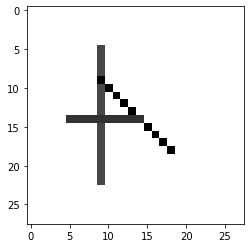


Predicted class is 'four'

Saving trained model state

End MNIST CNN demo 


In [4]:
# mnist_cnn.py
# PyTorch 1.10.0-CPU Anaconda3-2020.02  Python 3.7.6
# Windows 10 

# reads MNIST data from text file rather than using
# built-in black box Dataset from torchvision

import numpy as np
import matplotlib.pyplot as plt
import torch as T

device = T.device('cpu')

# -----------------------------------------------------------

class MNIST_Dataset(T.utils.data.Dataset):
  # 784 tab-delim pixel values (0-255) then label (0-9)
  def __init__(self, src_file):
    all_xy = np.loadtxt(src_file, usecols=range(785),
      delimiter="\t", comments="#", dtype=np.float32)

    tmp_x = all_xy[:, 0:784]  # all rows, cols [0,783]
    tmp_x /= 255
    tmp_x = tmp_x.reshape(-1, 1, 28, 28)  # bs, chnls, 28x28
    tmp_y = all_xy[:, 784]    # 1-D required

    self.x_data = \
      T.tensor(tmp_x, dtype=T.float32).to(device)
    self.y_data = \
      T.tensor(tmp_y, dtype=T.int64).to(device) 

  def __len__(self):
    return len(self.x_data)

  def __getitem__(self, idx):
    lbl = self.y_data[idx]  # no use labels
    pixels = self.x_data[idx] 
    return (pixels, lbl)

# -----------------------------------------------------------

class Net(T.nn.Module):
  def __init__(self):
    super(Net, self).__init__()  # pre Python 3.3 syntax

    self.conv1 = T.nn.Conv2d(1, 32, 5)  # chnl-in, out, krnl
    self.conv2 = T.nn.Conv2d(32, 64, 5)
    self.fc1 = T.nn.Linear(1024, 512)   # [64*4*4, x]
    self.fc2 = T.nn.Linear(512, 256)
    self.fc3 = T.nn.Linear(256, 10)     # 10 classes
    self.pool1 = T.nn.MaxPool2d(2, stride=2) # kernel, stride
    self.pool2 = T.nn.MaxPool2d(2, stride=2)
    self.drop1 = T.nn.Dropout(0.25)
    self.drop2 = T.nn.Dropout(0.50)
  
  def forward(self, x):
    # convolution phase         # x is [bs, 1, 28, 28]
    z = T.relu(self.conv1(x))   # Size([bs, 32, 24, 24])
    z = self.pool1(z)           # Size([bs, 32, 12, 12])
    z = self.drop1(z)
    z = T.relu(self.conv2(z))   # Size([bs, 64, 8, 8])
    z = self.pool2(z)           # Size([bs, 64, 4, 4])
   
    # neural network phase
    z = z.reshape(-1, 1024)     # Size([bs, 1024])
    z = T.relu(self.fc1(z))     # Size([bs, 512])
    z = self.drop2(z)
    z = T.relu(self.fc2(z))     # Size([bs, 256])
    z = self.fc3(z)             # Size([bs, 10])
    return z

def accuracy(model, ds):
  ldr = T.utils.data.DataLoader(ds,
    batch_size=len(ds), shuffle=False)
  n_correct = 0
  for data in ldr:
    (pixels, labels) = data
    with T.no_grad():
      oupts = model(pixels)
    (_, predicteds) = T.max(oupts, 1)
    n_correct += (predicteds == labels).sum().item()

  acc = (n_correct * 1.0) / len(ds)
  return acc

def main():
  # 0. setup
  print("\nBegin MNIST with CNN demo ")
  np.random.seed(1)
  T.manual_seed(1)

  # 1. create Dataset
  print("\nCreating 1000-item train Dataset from text file ")
  train_file = "mnist_train_1000.txt"
  train_ds = MNIST_Dataset(train_file)

  bat_size = 10
  train_ldr = T.utils.data.DataLoader(train_ds,
    batch_size=bat_size, shuffle=True)

  # 2. create network
  print("\nCreating CNN network with 2 conv and 3 linear ")
  net = Net().to(device)

  # 3. train model
  max_epochs = 50  # 100 gives better results
  ep_log_interval = 5
  lrn_rate = 0.005
  
  loss_func = T.nn.CrossEntropyLoss()  # does log-softmax()
  optimizer = T.optim.SGD(net.parameters(), lr=lrn_rate)
  
  print("\nbat_size = %3d " % bat_size)
  print("loss = " + str(loss_func))
  print("optimizer = SGD")
  print("max_epochs = %3d " % max_epochs)
  print("lrn_rate = %0.3f " % lrn_rate)

  print("\nStarting training")
  net.train()  # set mode
  for epoch in range(0, max_epochs):
    ep_loss = 0  # for one full epoch
    for (batch_idx, batch) in enumerate(train_ldr):
      (X, y) = batch  # X = pixels, y = target labels
      optimizer.zero_grad()
      oupt = net(X)
      loss_val = loss_func(oupt, y)  # a tensor
      ep_loss += loss_val.item()  # accumulate
      loss_val.backward()  # compute grads
      optimizer.step()     # update weights
    if epoch % ep_log_interval == 0:
      print("epoch = %4d   loss = %0.4f" % (epoch, ep_loss))
  print("Done ") 

  # 4. evaluate model accuracy
  print("\nComputing model accuracy")
  net.eval()
  acc_train = accuracy(net, train_ds)  # all at once
  print("Accuracy on training data = %0.4f" % acc_train)

  test_file = "mnist_test_100.txt"
  test_ds = MNIST_Dataset(test_file)
  net.eval()
  acc_test = accuracy(net, test_ds)  # all at once
  print("Accuracy on test data = %0.4f" % acc_test)

  # 5. make a prediction
  print("\nMaking prediction for fake image: ")
  x = np.zeros(shape=(28,28), dtype=np.float32)
  for row in range(5,23):
    x[row][9] = 180  # vertical line
  for rc in range(9,19):
    x[rc][rc] = 250  # diagonal
  for col in range(5,15):  
    x[14][col] = 200  # horizontal
  x /= 255.0

  plt.tight_layout()
  plt.imshow(x, cmap=plt.get_cmap('gray_r'))
  plt.show()

  digits = ['zero', 'one', 'two', 'three', 'four', 'five', 
    'six', 'seven', 'eight', 'nine' ]
  x = x.reshape(1, 1, 28, 28)  # 1 image, 1 channel
  x = T.tensor(x, dtype=T.float32).to(device)
  with T.no_grad():
    oupt = net(x)  # 10 logits like [[-0.12, 1.03, . . ]]
  am = T.argmax(oupt) # 0 to 9
  print("\nPredicted class is \'" + digits[am] + "\'")

  # 6. save model
  print("\nSaving trained model state")
  fn = "mnist_model.pt"
  T.save(net.state_dict(), fn)  

  print("\nEnd MNIST CNN demo ")

if __name__ == "__main__":
  main()



All the control logic is in a program-defined main() function. The program begins with some preparation statements:

```
import numpy as np
import matplotlib.pyplot as plt
import torch as T
device = T.device('cpu')

def main():
  # 0. setup
  print("Begin MNIST with CNN demo ")
  np.random.seed(1)
  T.manual_seed(1)
. . .
```

Setting the numpy and torch random number seeds allows reproducible results in most, but not all, situations. PyTorch program reproducibility is a tricky topic. Next, the demo program creates a program-defined training Dataset object and feeds it to a built-in DataLoader object:

```
  train_file = ".\\Data\\mnist_train_1000.txt"
  train_ds = MNIST_Dataset(train_file)
  bat_size = 10
  train_ldr = T.utils.data.DataLoader(train_ds,
    batch_size=bat_size, shuffle=True)
```

The batch size is a hyperparameter that must be determined by trial and error guided by experience. In general, it's a good idea to use a batch size that evenly divides the size of the training data so that all batches are the same size.

Next, the demo creates the CNN network and sets up the training parameters:

```
 net = Net().to(device)
  max_epochs = 50  # 100 gives better results
  ep_log_interval = 5
  lrn_rate = 0.005
  loss_func = T.nn.CrossEntropyLoss()  # does log-softmax()
  optimizer = T.optim.SGD(net.parameters(), lr=lrn_rate)
  net.train()  # set mode
```

The CrossEntropyLoss() is the most common choice for multi-class classification, but MSELoss() is a viable alternative. The demo uses SGD (stochastic gradient descent) training optimization rather than the more common Adam optimization. SGD works far better for the demo CNN network architecture. Even though the default network mode is train() rather than eval(), in my opinion it's good practice to explicitly set the mode.

The demo trains the CNN network using these statements:

```
  for epoch in range(0, max_epochs):
    ep_loss = 0  # for one full epoch
    for (batch_idx, batch) in enumerate(train_ldr):
      (X, y) = batch  # X = pixels, y = target labels
      optimizer.zero_grad()
      oupt = net(X)
      loss_val = loss_func(oupt, y)  # a tensor
      ep_loss += loss_val.item()  # accumulate
      loss_val.backward()  # compute grads
      optimizer.step()     # update weights
    if epoch % ep_log_interval == 0:
      print("epoch = %4d loss = %0.4f" % (epoch, ep_loss))
```

It's important to monitor loss/error during training to determine if training is working or not. Training failure is the norm rather than the exception when working with neural networks. The demo accumulates total loss for each epoch. Because this depends on the batch size, you might want to compute an average loss per data item.

After training completes, the demo computes classification accuracy on the 1,000-item training data and the 100-item test data:

```
  net.eval()
  acc_train = accuracy(net, train_ds)  # all at once
  print("Accuracy on training data = %0.4f" % acc_train)
  test_file = ".\\Data\\mnist_test_100.txt"
  test_ds = MNIST_Dataset(test_file)
  net.eval()
  acc_test = accuracy(net, test_ds)  # all at once
  print("Accuracy on test data = %0.4f" % acc_test)
```

The program-defined accuracy() function accepts a Dataset object so the training accuracy can be computed using the existing training Dataset, but the test accuracy needs a new Dataset created from the test data.

The demo uses the trained model to make a prediction for a fake image. First, a fake 28 x 28 image is created:

```
 print("Making prediction for fake image: ")
  x = np.zeros(shape=(28,28), dtype=np.float32)
  for row in range(5,23):
    x[row][9] = 180  # vertical line
  for rc in range(9,19):
    x[rc][rc] = 250  # diagonal
  for col in range(5,15):  
    x[14][col] = 200  # horizontal
```

Recall that each pixel value is an integer between 0 and 255. In most cases 0 represents white, and larger values are darker shades of gray up to 255, which is black. The Dataset object normalizes input by dividing by 255 so the fake image is normalized too. The fake image is displayed using the imshow() method of the matplotlib library:

```
 x /= 255.0
  plt.tight_layout()
  plt.imshow(x, cmap=plt.get_cmap('gray_r'))
  plt.show()
```

By default, imshow() normalizes its input using the min and max values. Therefore, the fake image could have been displayed before normalization division by 255. The gray_r argument means gray-reversed colormap.

The label/digit for the fake image is predicted using these statements:

```
 digits = ['zero', 'one', 'two', 'three', 'four', 'five', 
    'six', 'seven', 'eight', 'nine' ]
  x = x.reshape(1, 1, 28, 28)  # 1 image, 1 channel
  x = T.tensor(x, dtype=T.float32).to(device)
  with T.no_grad():
    oupt = net(x)  # 10 logits like [[-0.12, 1.03, . . ]]
  am = T.argmax(oupt) # 0 to 9
  print("Predicted class is \'" + digits[am] + "\'")
```

The fake image is reshaped from 28 x 28 to [1, 1, 28, 28] because that's the shape expected by the CNN network. The first 1 is the batch size, the second 1 is the number of channels, which is set to 1 because MNIST images are grayscale. You'd use channel = 3 for color images. The output is a set of 10 logits where the largest value is the predicted class. Logit values do not sum to 1 so you might want to apply the softmax() function to convert the logits to pseudo-probabilities.

The demo program concludes by saving the trained model weights and bias values:

```
  . . .
  print("Saving trained model state")
  fn = ".\\Models\\mnist_model.pt"
  T.save(net.state_dict(), fn)  
  print("End MNIST CNN demo ")
if __name__ == "__main__":
  main()
```

The state_dict() method saves model weights and biases, but does not save the model definition. Therefore, to load the saved model from another program, you must place the code that defines the network in that other program.

## The Convolutional Neural Network

The definition of the CNN network used in the demo begins by specifying two convolutional layers and three linear layers:

```
class Net(T.nn.Module):
  def __init__(self):
    super(Net, self).__init__()  # pre Python 3.3 syntax
    self.conv1 = T.nn.Conv2d(1, 32, 5)  # chnl-in, out, krnl
    self.conv2 = T.nn.Conv2d(32, 64, 5)
    self.fc1 = T.nn.Linear(1024, 512)   # [64*4*4, x]
    self.fc2 = T.nn.Linear(512, 256)
    self.fc3 = T.nn.Linear(256, 10)     # 10 classes
```

The demo network also defines two pooling layers and two dropout layers:



```
    self.pool1 = T.nn.MaxPool2d(2, stride=2)   # kernel, stride
    self.pool2 = T.nn.MaxPool2d(2, stride=2)
    self.drop1 = T.nn.Dropout(0.25)
    self.drop2 = T.nn.Dropout(0.50)
```

In principle it's possible to create a neural network classifier for MNIST data using just a single linear layer that accepts 784 input values and emits 10 logits or pseudo-probabilities. But this approach doesn't work too well. You can think of the demo network as a series of transformations, from 784 input pixel values down to 10 logit values.

A linear layer is defined by the number of input values and the number of output values. A convolutional layer is defined by number of input and output values but also a kernel value. Loosely speaking, the kernel value controls how many pixels to look at as a group. The demo convolutional layers use a kernel size of 5 so the image to classify is analyzed by looking at 5 x 5 blocks of pixels. This corresponds to how humans look at an image -- scanning areas of an image instead of looking at the entire image all at once.

The demo uses two 2 x 2 max-pooling layers. Pooling is optional. Because an image can have millions of pixel values, a neural network classifier can have hundreds of millions of weights and biases. A 2 x 2 max-pooling layer takes 2 x 2 pixel blocks and replaces those four pixels by the largest pixel value. This reduces the number of weights and biases that must be trained. The stride value controls how the 2 x 2 blocks move across the image. Because MNIST images are so small, a small stride value of 2 is used in the demo.

The demo uses two dropout layers. Neural network image classifiers tend to be prone to overfitting. Overfitting results in a trained model that predicts very well for the training images but predicts poorly for new, previously unseen images. Dropout layers help to moderate overfitting.

The CNN forward() method has two phases. First, convolution, augmented by pooling and dropout is applied, and then linear transformation, augmented by dropout, is applied. The convolution phase is:

```
 def forward(self, x):
    # convolution phase         # x is [bs, 1, 28, 28]
    z = T.relu(self.conv1(x))   # Size([bs, 32, 24, 24])
    z = self.pool1(z)           # Size([bs, 32, 12, 12])
    z = self.drop1(z)
    z = T.relu(self.conv2(z))   # Size([bs, 64, 8, 8])
    z = self.pool2(z)           # Size([bs, 64, 4, 4])
. . .
```

The input x image is assumed to have shape [batch_size, 1, 28, 28]. The 1 is the number of image channels, which is 1 because MNIST images are grayscale. The first convolution transformation results in a tensor with shape [bs, 32, 24, 24] -- much larger than the original. Pooling reduces the size to [bs, 32, 12, 12]. The second convolution and pooling results in a tensor with shape [bs, 64, 4, 4].

The number of convolution layers, their transformation shapes, the pooling size and whether to use dropout or not are all design decisions that can require a lot of experimentation.

After the convolution phase, the linear phase of the forward() method is:

```
    z = z.reshape(-1, 1024)     # Size([bs, 1024])
    z = T.relu(self.fc1(z))     # Size([bs, 512])
    z = self.drop2(z)
    z = T.relu(self.fc2(z))     # Size([bs, 256])
    z = self.fc3(z)             # Size([bs, 10])
    return z
```

The current 4-dimensional tensor has shape [bs, 64, 4, 4] which is reshaped to a 2-dimensional tensor with shape [bs, 1024]. The demo uses the special -1 syntax which means "however much is left". This allows different batch sizes.

In practice, the most difficult part of implementing a convolutional neural network is determining the channel input and output sizes of the convolutional layers when they're defined in the __init__() method. It's possible to manually calculate these sizes, but it's much easier to determine these sizes empirically by adding statements such as print(z.shape) during development.

## Wrapping Up

From a developer's point of view, there are two different ways to tackle an image recognition problem. One approach is to implement a custom system using the techniques presented in this article. A different approach is to use pre-built generic models such as those available from Azure Cognitive Services.

Imagine that you work for a company that makes passenger elevators for business buildings. Your service technicians out in the field must deal with dozens of different types of elevators, some of them decades old, with thousands of different parts. You could train a neural model to recognize your elevator parts and then identify them when service technicians upload a photo they took from their phone camera.

